In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic')

In [23]:
df = pd.read_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/rawdata/법정동코드/한국행정구역분류가공.csv', index_col=0)
df

,시도,중분류,시군구,소분류,읍면동,영문표기,한자 표기,비고
대분류,,,,,,,,
11,서울특별시,11010,종로구,11010720,청운효자동,Cheongunhyoja-dong,淸雲孝子洞,1101072
11,서울특별시,11010,종로구,11010530,사직동,Sajik-dong,社稷洞,1101053
11,서울특별시,11010,종로구,11010540,삼청동,Samcheong-dong,三淸洞,1101054
11,서울특별시,11010,종로구,11010550,부암동,Buam-dong,付岩洞,1101055
11,서울특별시,11010,종로구,11010560,평창동,Pyeongchang-dong,平倉洞,1101056
...,...,...,...,...,...,...,...,...
39,제주특별자치도,39020,서귀포시,39020580,서홍동,Seohong-dong,西烘洞,3902058
39,제주특별자치도,39020,서귀포시,39020590,대륜동,Daeryun-dong,大倫洞,3902059
39,제주특별자치도,39020,서귀포시,39020600,대천동,Daecheon-dong,大川洞,3902060


In [26]:
df.drop(['영문표기', '한자 표기', '비고'], axis=1, inplace=True)
df

,시도,중분류,시군구,소분류,읍면동
대분류,,,,,
11,서울특별시,11010,종로구,11010720,청운효자동
11,서울특별시,11010,종로구,11010530,사직동
11,서울특별시,11010,종로구,11010540,삼청동
11,서울특별시,11010,종로구,11010550,부암동
11,서울특별시,11010,종로구,11010560,평창동
...,...,...,...,...,...
39,제주특별자치도,39020,서귀포시,39020580,서홍동
39,제주특별자치도,39020,서귀포시,39020590,대륜동
39,제주특별자치도,39020,서귀포시,39020600,대천동


In [9]:
# 메인 데이터셋 불러오기
main_df = pd.read_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/cleaned_data/freq_with_holiday.csv', index_col=0)
main_df

/Users/seulalee/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,day_name,holiday
0,2019-08-01,0,강원도,속초시,교동,1,목,N,N
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4,목,N,N
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28,목,N,N
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3,목,N,N
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4,목,N,N
...,...,...,...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6,화,N,N
2382977,2021-08-31,23,충청북도,제천시,신백동,6,화,N,N
2382978,2021-08-31,23,충청북도,제천시,신월동,2,화,N,N
2382979,2021-08-31,23,충청북도,제천시,천남동,1,화,N,N


In [27]:
df.시군구.nunique()

226

In [28]:
main_df.시군구.nunique()

141

In [35]:
main_df

,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일,day_name,holiday
0,2019-08-01,0,강원도,속초시,교동,1,목,N,N
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4,목,N,N
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28,목,N,N
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3,목,N,N
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4,목,N,N
...,...,...,...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6,화,N,N
2382977,2021-08-31,23,충청북도,제천시,신백동,6,화,N,N
2382978,2021-08-31,23,충청북도,제천시,신월동,2,화,N,N
2382979,2021-08-31,23,충청북도,제천시,천남동,1,화,N,N


In [41]:
df

,시도,중분류,시군구,소분류,읍면동
대분류,,,,,
11,서울특별시,11010,종로구,11010720,청운효자동
11,서울특별시,11010,종로구,11010530,사직동
11,서울특별시,11010,종로구,11010540,삼청동
11,서울특별시,11010,종로구,11010550,부암동
11,서울특별시,11010,종로구,11010560,평창동
...,...,...,...,...,...
39,제주특별자치도,39020,서귀포시,39020580,서홍동
39,제주특별자치도,39020,서귀포시,39020590,대륜동
39,제주특별자치도,39020,서귀포시,39020600,대천동


In [44]:
# 광역시 이하 시군구별 갯수 확인
main_df.groupby(['광역시도', '시군구', '읍면동', '시간대']).size()

광역시도  시군구  읍면동  시간대
강원도   강릉시  교동   9        3
                10      92
                11     242
                12     240
                13     223
                      ... 
충청북도  충주시  호암동  19      18
                20      13
                21       6
                22       4
                23       3
Length: 12221, dtype: int64

# balanced 확인에서   
## 1. 누락지역을 확인  
- 다른 데이터셋이랑 맞춰봐서 확인
## 2. 누락 날짜 확인  
- 모든 읍면동에 날짜 갯수(nunique)가 동일한지 확인
## 3. 누락 시간대 확인
- 모든 읍면동 날짜별 시간대 갯수(nunique)가 동일한지 확인

In [46]:
# 저 위에꺼 자동화해서 갯수 카운트해서 맞춰보고 0~23까지 중에 누락된 거 있으면 따로 빼서 표 만들어주기
# 광역시도 시군구 읍면동 별로 시간대와 날짜 갯수가 몇 개씩 있는지 확인필요함
main_df.groupby(['광역시도', '시군구', '읍면동', '날짜']).시간대.nunique()

광역시도  시군구  읍면동  날짜        
강원도   강릉시  교동   2019-08-02     1
                2019-08-03     2
                2019-08-04     5
                2019-08-05     5
                2019-08-06     5
                              ..
충청북도  충주시  호암동  2021-03-03     3
                2021-03-06     1
                2021-03-09    14
                2021-03-10    14
                2021-03-11    13
Name: 시간대, Length: 255511, dtype: int64

In [49]:
# 시군구, 광역시도, 읍면동, 날짜갯수, 시간대갯수
main_df.groupby(['광역시도', '시군구', '읍면동']).시간대.nunique()

광역시도  시군구  읍면동 
강원도   강릉시  교동      13
           송정동      9
      삼척시  교동      12
           남양동     13
      속초시  교동      15
                   ..
충청북도  충주시  연수동     16
           용산동     15
           중앙탑면     5
           칠금동     15
           호암동     14
Name: 시간대, Length: 913, dtype: int64

In [54]:
main_df.groupby(['광역시도','시군구','읍면동']).날짜.nunique().max()
# 실제로 2019.08.01부터 2021.08.31은 762일임. 그런데 날짜 max값 찍어보니 754개뿐임
# 즉 모든 날짜가 다 있지 않음

754

In [48]:
main_df['배달건수'].min()
# 배달건수 min이 0이 아니라 1임....하아....

1

In [84]:
main_df_count = main_df.groupby(['광역시도','시군구','읍면동']).nunique().reset_index()
main_df_count = main_df_count.drop(['배달건수'], axis=1)
main_df_count

,광역시도,시군구,읍면동,날짜,시간대,요일,day_name,holiday
0,강원도,강릉시,교동,485,13,7,14,2
1,강원도,강릉시,송정동,24,9,7,1,1
2,강원도,삼척시,교동,50,12,7,4,2
3,강원도,삼척시,남양동,699,13,7,15,2
4,강원도,속초시,교동,117,15,7,5,2
...,...,...,...,...,...,...,...,...
908,충청북도,충주시,연수동,70,16,7,3,2
909,충청북도,충주시,용산동,89,15,7,3,2
910,충청북도,충주시,중앙탑면,1,5,1,1,1
911,충청북도,충주시,칠금동,4,15,3,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

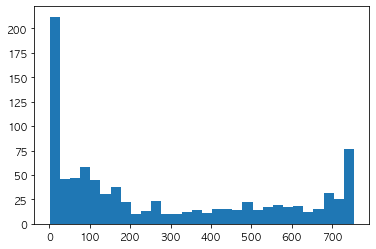

In [94]:
# 날짜 분포 먼저 확인하자
# 가로축이 날짜 갯수(0~753)고, 세로축이 해당 날짜 갯수를 가진 시군구(총 913개의 n)  
n, bins, patches = plt.hist(main_df_count['날짜'], bins=30)
# sns.distplot(main_df_count['날짜'])
plt.show

## 여기서 알 수 있는것
전체 913개의 지역 중 해당 전체 기간 762일 중 절반 이상 날짜의 값을 가지고 있는 데이터 조차 매우 일부임

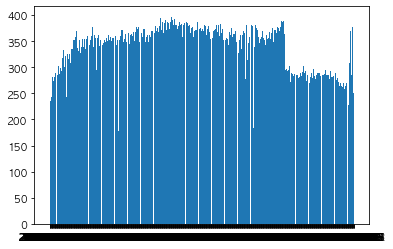

In [104]:
# x축을 날짜로(날짜 갯수가 아니고), 세로축 record 갯수로 쌓아서, 어떤 기간의 데이터가 많이 누락되어 있는지 보고 
# 거기에 어떤 경향성이 있으면(=배달이 많이 없을만한 날이 주로 누락되었다면) 그럼 없는 데이터를 0으로 간주해도 무방할 것
main_df_count = main_df.groupby(['광역시도','시군구','읍면동', '날짜']).size().reset_index()
n, bins, patched = plt.hist(main_df_count['날짜'], bins=800)
plt.show()

# 그림 보면 아예 데이터가 없는 날짜들이 며칠 있음. 즉 이 날짜들에는 전지역에서 아예 아무런 데이터가 생성되지 않은 것임

In [115]:
# 아예 데이터 없는 날짜들만 뽑아보기
import datetime

entire_dates = pd.date_range(start='08/01/2019', end='8/31/2021')
entire_dates

DatetimeIndex(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
               '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
               '2019-08-09', '2019-08-10',
               ...
               '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-29',
               '2021-08-30', '2021-08-31'],
              dtype='datetime64[ns]', length=762, freq='D')

In [ ]:
# entire_dates랑 날짜 unique()값이랑 맞춰서 하나도 없는거 찾기

# 광역시도*시군구*읍면동 별로 날짜 unique()값을 뽑은 다음에 걔랑 entire_date랑 비교해서 

for i in range(len(entire_dates)):
    if entire_dates[i] is in main_df.groupby([])

In [121]:
main_df.groupby(['광역시도','시군구','읍면동','날짜']).size().reset_index()

,광역시도,시군구,읍면동,날짜,0
0,강원도,강릉시,교동,2019-08-02,1
1,강원도,강릉시,교동,2019-08-03,2
2,강원도,강릉시,교동,2019-08-04,5
3,강원도,강릉시,교동,2019-08-05,5
4,강원도,강릉시,교동,2019-08-06,5
...,...,...,...,...,...
255506,충청북도,충주시,호암동,2021-03-03,3
255507,충청북도,충주시,호암동,2021-03-06,1
255508,충청북도,충주시,호암동,2021-03-09,14
255509,충청북도,충주시,호암동,2021-03-10,14


In [98]:
# x축에 날짜로 주고, 데이터 record 갯수 확인해보기
# 밑에꺼는 날짜 안에 시간대 몇개나 커버되는지임
main_df_count = main_df.groupby(['광역시도','시군구','읍면동','날짜']).size().reset_index()


,광역시도,시군구,읍면동,날짜,0
0,강원도,강릉시,교동,2019-08-02,1
1,강원도,강릉시,교동,2019-08-03,2
2,강원도,강릉시,교동,2019-08-04,5
3,강원도,강릉시,교동,2019-08-05,5
4,강원도,강릉시,교동,2019-08-06,5
...,...,...,...,...,...
255506,충청북도,충주시,호암동,2021-03-03,3
255507,충청북도,충주시,호암동,2021-03-06,1
255508,충청북도,충주시,호암동,2021-03-09,14
255509,충청북도,충주시,호암동,2021-03-10,14


In [131]:
# pivot_table로 해보자!!
pivot1 = pd.pivot_table()

array(['2019-08-02', '2019-08-03', '2019-08-04', '2019-08-05',
       '2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09',
       '2019-08-10', '2019-08-11', '2019-08-12', '2019-08-13',
       '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-17',
       '2019-08-18', '2019-08-19', '2019-08-20', '2019-08-21',
       '2019-08-22', '2019-08-23', '2019-08-24', '2019-08-25',
       '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29',
       '2019-08-30', '2019-08-31', '2019-09-01', '2019-09-02',
       '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06',
       '2019-09-07', '2019-09-08', '2019-09-09', '2019-09-10',
       '2019-09-11', '2019-09-12', '2019-09-14', '2019-09-15',
       '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19',
       '2019-09-20', '2019-09-21', '2019-09-22', '2019-09-23',
       '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
       '2019-09-29', '2019-10-01', '2019-10-02', '2019-10-03',
       '2019-10-04', '2019-10-05', '2019-10-06', '2019-